In [1]:
#CONSTANTS
DATA_PATH = '../data/raw/train.csv'
EXPORT_PATH = '../data/processed/1_preprocessed_df.pkl'

In [2]:
# Load packages
import pickle
import pandas as pd
import numpy as np
import missingno as ms
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

Processing

Process data

In [3]:
raw_df = pd.read_csv(DATA_PATH)
df = raw_df.copy()

Handling missing values

<AxesSubplot:>

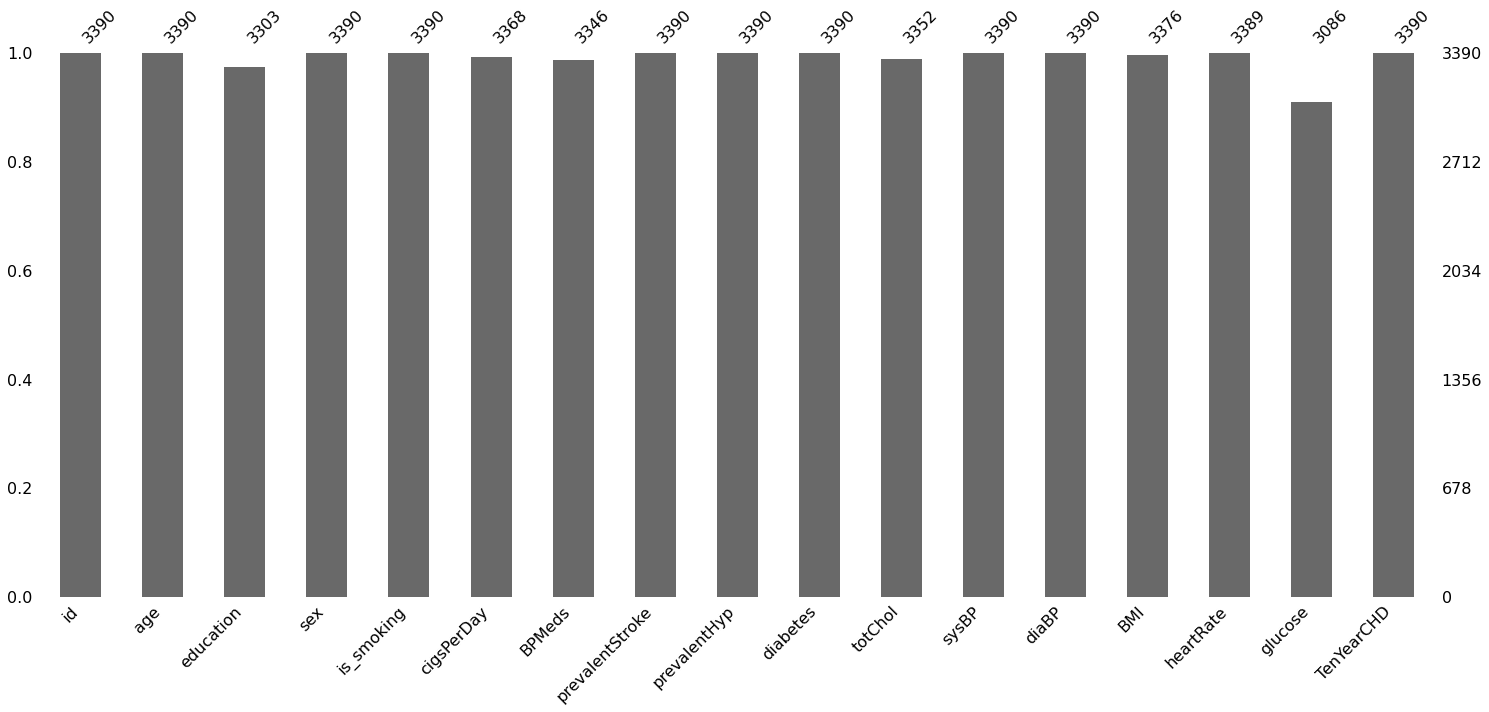

In [4]:
ms.bar(df)

In [5]:
df.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [6]:
missing_values_count = df.isnull().sum()
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

0.8849557522123894


In [7]:
df['education'].fillna(df['education'].mode()[0],inplace=True)
df['cigsPerDay'].fillna(df['cigsPerDay'].mean(),inplace=True)
df['BPMeds'].fillna(df['BPMeds'].mean(),inplace=True)
df['totChol'].fillna(df['totChol'].mean(),inplace=True)
df['BMI'].fillna(df['BMI'].mean(),inplace=True)
df['heartRate'].fillna(df['heartRate'].mode()[0],inplace=True)
df['glucose'].fillna(df['glucose'].mean(),inplace=True)

In [8]:
df.isna().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

Encoding

In [9]:
df['sex']=df['sex'].map({'M':0,'F':1})
df['is_smoking']=df['is_smoking'].map({'YES':1,'NO':0})

In [10]:
df

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,1,1,3.0,0.000000,0,0,0,221.0,148.0,85.0,25.794964,90.0,80.0,1
1,1,36,4.0,0,0,0.0,0.000000,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.0,0
2,2,46,1.0,1,1,10.0,0.000000,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.0,0
3,3,50,1.0,0,1,20.0,0.000000,0,1,0,233.0,158.0,88.0,28.260000,68.0,94.0,1
4,4,64,1.0,1,1,30.0,0.000000,0,0,0,241.0,136.5,85.0,26.420000,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,60,1.0,1,0,0.0,0.000000,0,0,0,261.0,123.5,79.0,29.280000,70.0,103.0,0
3386,3386,46,1.0,1,0,0.0,0.000000,0,0,0,199.0,102.0,56.0,21.960000,80.0,84.0,0
3387,3387,44,3.0,0,1,3.0,0.000000,0,1,0,352.0,164.0,119.0,28.920000,73.0,72.0,1
3388,3388,60,1.0,0,0,0.0,0.029886,0,1,0,191.0,167.0,105.0,23.010000,80.0,85.0,0


EXPORT DATA

In [11]:
df.to_pickle(EXPORT_PATH)